In [145]:
import pandas as pd

##### Importing the file

In [148]:
df = pd.read_csv('./dataset.csv')

##### assessing the dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [5]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [6]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


##### I make a copy of the original dataframe, which is what I will be working with

In [88]:
df_workmide = df.copy()

##### I renamed the User Rating column to User_Rating for easy manipulation

In [108]:
df_workmide.rename(columns = {'User Rating':'User_Rating'}, inplace = True)
df_workmide.head()

,Name,Author,User_Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [9]:
df_workmide.Name.value_counts()

Publication Manual of the American Psychological Association, 6th Edition                                              10
StrengthsFinder 2.0                                                                                                     9
Oh, the Places You'll Go!                                                                                               8
The Very Hungry Caterpillar                                                                                             7
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change                                            7
                                                                                                                       ..
Option B: Facing Adversity, Building Resilience, and Finding Joy                                                        1
Divine Soul Mind Body Healing and Transmission System: The Divine Way to Heal You, Humanity, Mother Earth, and All…     1
Divergent / Insurgent   

##### from the above, it is noticable that several titles appear more than once which hints at the presence of duplicate data. Let's check if we do actually have some duplicate data

In [11]:
NonDuplicateCount = df_workmide.Name.nunique()
NonDuplicateCount

351

##### we have just 351 unique titles out of 550 rows. This means we have duplicate titles

In [12]:
df_workDuplicate = df_workmide[df_workmide.duplicated(subset=['Name','Author'], keep=False)]
df_workDuplicate

,Name,Author,User Rating,Reviews,Price,Year,Genre
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction
10,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2017,Fiction
20,All the Light We Cannot See,Anthony Doerr,4.6,36348,14,2014,Fiction
21,All the Light We Cannot See,Anthony Doerr,4.6,36348,14,2015,Fiction
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction
...,...,...,...,...,...,...,...
544,Wonder,R. J. Palacio,4.8,21625,9,2017,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


##### from the query above, there are 295 rows of data with books of the same title and author appearing severally and with the SAME number of reviews. This suggests that the original entry was duplicted several times in different years. so we must drop these duplicate values so we can have a true image of the actual dataframe

In [13]:
df_workmide.drop_duplicates(subset =['Name', 'Author', 'Reviews'], 
                     keep = False, inplace = True) 

##### now we check if we still have repeated data

In [14]:
df_workDuplicate = df_workmide[df_workmide.duplicated(subset=['Name','Author', 'Reviews'], keep=False)]
df_workDuplicate

,Name,Author,User Rating,Reviews,Price,Year,Genre


In [116]:
df_workmide.describe()

,User_Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


# Question 1: Visualise the best selling books of the decade

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

<Figure size 576x576 with 0 Axes>

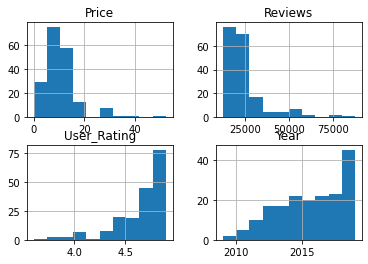

In [143]:
df_highestReviews = df_workmide.query('Reviews >= 11953.281818')

fig = plt.figure(figsize = (8, 8)) 

df_highestReviews.hist();

# Question 2: The percentage of fiction to non-fiction

In [26]:
df_Fiction = df_workmide.query('Genre == "Fiction"')
df_Fiction.count()

Name           116
Author         116
User_Rating    116
Reviews        116
Price          116
Year           116
Genre          116
dtype: int64

In [27]:
df_NonFiction = df_workmide.query('Genre == "Non Fiction"')
df_NonFiction.count()

Name           139
Author         139
User_Rating    139
Reviews        139
Price          139
Year           139
Genre          139
dtype: int64

##### From the steps above, we have 116 fiction books and 139 non fiction

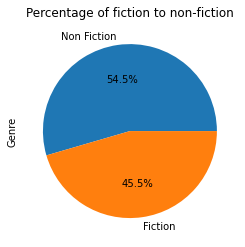

In [35]:
ind = df_workmide['Genre'].value_counts().index
df_workmide['Genre'].value_counts()[ind].plot(kind='pie', autopct='%1.1f%%', fig=(8,8))
plt.title('Percentage of fiction to non-fiction')
plt.show()

# Question 3: Top 10 authors according to reviews

##### To find the top 10 authors via reviews, we will look at the highest reviews and pick the authors with the 10 highest reviewa

In [36]:
df_workmide.describe()

,User_Rating,Reviews,Price,Year
count,255.000000,255.000000,255.000000,255.000000
mean,4.603922,7321.474510,13.282353,2013.647059
std,0.229481,8273.688204,9.170663,3.391882
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,2624.500000,8.000000,2010.000000
50%,4.600000,5235.000000,12.000000,2014.000000
75%,4.800000,9245.000000,16.500000,2017.000000
max,4.900000,87841.000000,82.000000,2019.000000


In [103]:
tt10 = df_workmide.sort_values(['Reviews'], ascending=False)
#df.iloc[196:, 1:].sum().plot(kind='bar');
#tt20 = tt10.head(10)
tt20 = tt10.iloc[:10, :]
tt20

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
383,The Girl on the Train,Paula Hawkins,4.1,79446,7,2016,Fiction
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction
137,Gone Girl,Gillian Flynn,4.0,57271,9,2014,Fiction
135,Gone Girl,Gillian Flynn,4.0,57271,10,2012,Fiction
136,Gone Girl,Gillian Flynn,4.0,57271,10,2013,Fiction
368,The Fault in Our Stars,John Green,4.7,50482,13,2014,Fiction
367,The Fault in Our Stars,John Green,4.7,50482,7,2014,Fiction


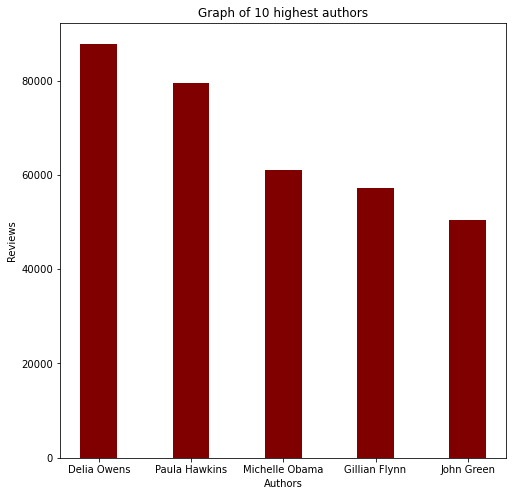

In [115]:
fig = plt.figure(figsize = (8, 8)) 
  
# creating the bar plot 
plt.bar(tt20.Author, tt20.Reviews, color ='maroon', width = 0.4)

plt.xlabel("Authors") 
plt.ylabel("Reviews") 
plt.title("Graph of 10 highest authors")
plt.show() 

# Question 4: Visualize the trends over the years

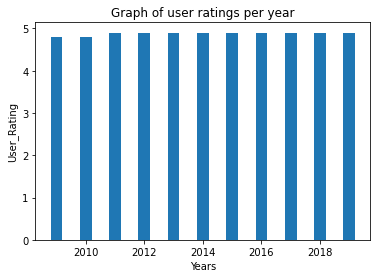

In [137]:
x = df_workmide.Year
y = df_workmide.User_Rating
#plt.plot(x, y)
plt.bar(df_workmide.Year, df_workmide.User_Rating, width = 0.4)
plt.xlabel("Years") 
plt.ylabel("User_Rating") 
plt.title('Graph of user ratings per year') 
plt.show() 

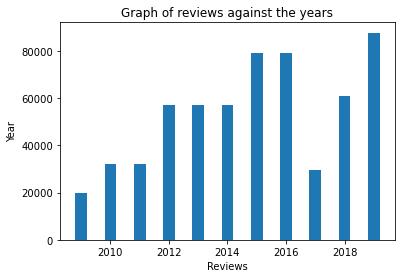

In [138]:
plt.bar(df_workmide.Year, df_workmide.Reviews, width = 0.4)
plt.xlabel("Reviews") 
plt.ylabel("Year") 
plt.title('Graph of reviews against the years') 
plt.show() 

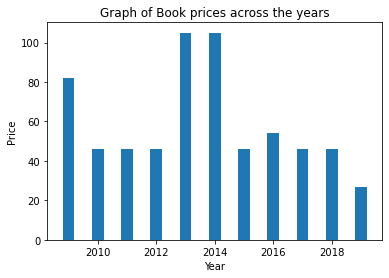

In [139]:
plt.bar(df_workmide.Year, df_workmide.Price, width = 0.4)
plt.xlabel("Year") 
plt.ylabel("Price") 
plt.title('Graph of Book prices across the years') 
plt.show() 